In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)

1.4.0


**Download data:** https://drive.google.com/file/d/1I93JznGUeIZ7FkoidlI1Sfedn_go3nqt/view?usp=sharing

In [3]:
filepath = r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B9\instacart-data\products.csv'
product_info = pd.read_csv(filepath)
product_info.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
N = 5e5

def Select_Aisle_ID(order_pro_id):
    #print(order_pro_id.head())
    product_aisle = product_info[['product_id', 'aisle_id']]
    order_aisle = pd.merge(order_pro_id, product_aisle, on='product_id')['aisle_id']
    aisle_count = order_aisle.value_counts().reset_index()
    aisle_count.columns = ['aisle_id', 'counts']
    # print(aisle_count.shape)
    return aisle_count
    

filepath = r'C:\Users\Hoanpc.TSTDESK01\Desktop\order_products__prior.csv'
order_products = pd.read_csv(filepath, chunksize=N, usecols=['product_id'])
chunk = next(order_products)
total_aisle_count = Select_Aisle_ID(chunk)

for i, chunk in enumerate(order_products):
    if i > 12: break
    chunk_count = Select_Aisle_ID(chunk)
    total_aisle_count = pd.concat([total_aisle_count, chunk_count])
    print(total_aisle_count.shape)

print(total_aisle_count.head())

(268, 2)
(402, 2)
(536, 2)
(670, 2)
(804, 2)
(938, 2)
(1072, 2)
(1206, 2)
(1340, 2)
(1474, 2)
(1608, 2)
(1742, 2)
(1876, 2)
   aisle_id  counts
0        24   56326
1        83   52073
2       123   27347
3       120   22485
4        21   14960


In [5]:
total_aisle_count = total_aisle_count.groupby('aisle_id').sum().reset_index()
total_aisle_count.head()

,aisle_id,counts
0,1,15632
1,2,17897
2,3,98222
3,4,43156
4,5,13521


In [6]:
n_aisle_id = total_aisle_count.nlargest(10, columns='counts')
n_aisle_id

,aisle_id,counts
23,24,786888
82,83,737374
122,123,381575
119,120,313279
20,21,211480
83,84,192052
114,115,181060
106,107,156875
90,91,138111
111,112,125989


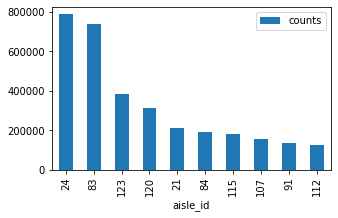

In [7]:
n_aisle_id.plot.bar(x='aisle_id', y='counts', figsize=(5,3))
plt.show()
plt.close('all')

In [8]:
filepath = r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B9\instacart-data\aisles.csv'
aisle_info = pd.read_csv(filepath)
aisle_info.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
n_aisle_name = pd.merge(n_aisle_id, aisle_info, on='aisle_id')
n_aisle_name

,aisle_id,counts,aisle
0,24,786888,fresh fruits
1,83,737374,fresh vegetables
2,123,381575,packaged vegetables fruits
3,120,313279,yogurt
4,21,211480,packaged cheese
5,84,192052,milk
6,115,181060,water seltzer sparkling water
7,107,156875,chips pretzels
8,91,138111,soy lactosefree
9,112,125989,bread


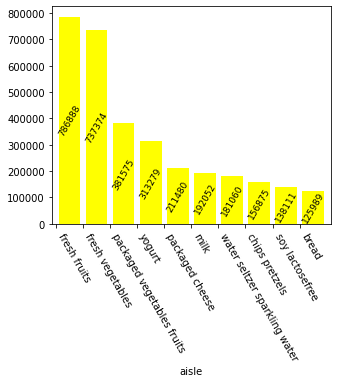

In [10]:
ax = n_aisle_name.plot.bar(x='aisle', y='counts', width=0.8, figsize=(5,4), 
                           color='yellow', legend=None, rot=-60)
ax.bar_label(container=ax.containers[0], label_type='center', fontsize=9, rotation=60)
ax.set_xticks(n_aisle_name.index-0.5)
ax.set_xticklabels(n_aisle_name['aisle'], ha='left')
plt.show()
plt.close('all')